In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.interpolate

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg
import ecoevocrm.strain_pool as sp

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

----

In [4]:
def interp_series_plot(interp, t_vals):
    fig, ax = plt.subplots(1, 1, figsize=(16, 4))
    for i in range(L):
        ax.plot(t_vals, interp(t_vals)[i, :]) 
    ax.set_ylim(ymin=min(0, np.min(interp(t_vals))))

----

## Model parameters

### Simulation

In [5]:
T_total = 1e4

### Traits

In [6]:
L = 10

In [7]:
sigma = utils.binary_combinations(L, exclude_all_zeros=True)
sigma = sigma/sigma.sum(axis=1, keepdims=1)

### Costs

In [8]:
chi = 0.5

In [9]:
xi = 0.1

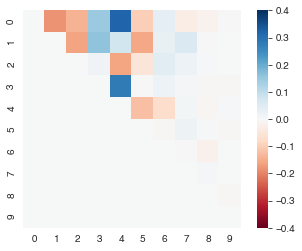

In [10]:
J = utils.random_matrix((L, L), 'tikhonov_sigmoid', args={'n_star': 5, 'delta': 1}, triangular=True, diagonal=0)
viz.matrix_plot(J, vmin=-0.4, vmax=0.4)

### Environment

In [11]:
rho_0       = 1
rho_lamda   = 1e-3
rho_k       = 1e-8
rho_etamean = 0
rho_etastd  = 1e-8
rho_dt      = 1e3

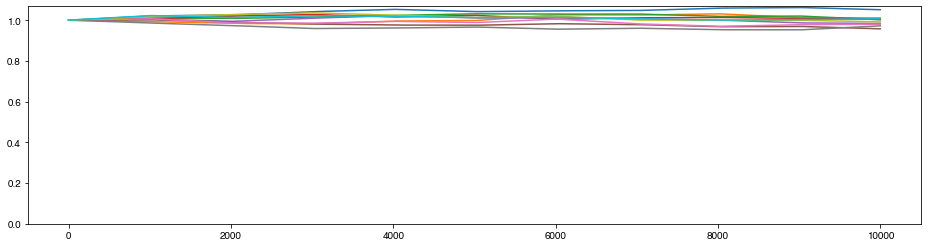

In [12]:
rho_series = utils.brownian_series(T=2*T_total, dt=rho_dt, L=L, lamda=rho_lamda, eta_mean=rho_etamean, eta_std=rho_etastd, k=rho_k, y0=rho_0, v0=0, return_interp=True)
interp_series_plot(rho_series, t_vals=np.arange(0, T_total, step=1))

------

## Run system

In [13]:
system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma[0], xi=xi, chi=chi, J=J, mu=1e-10, binarize_traits_J_cost_terms=True), 
                                resource_set=ResourceSet(num_resources=L, rho=rho_series), 
                                N_init=1, R_init=1, convergent_lineages=False, max_time_step=1e2)

In [14]:
system.run(T=T_total)

In [15]:
print(system.type_set.lineage_ids[:200])

['1', '1.1', '1.1.1', '1.1.10', '1.1.10.1', '1.1.11', '1.1.12', '1.1.13', '1.1.14', '1.1.15', '1.1.16', '1.1.16.1', '1.1.17', '1.1.18', '1.1.19', '1.1.2', '1.1.20', '1.1.21', '1.1.22', '1.1.23', '1.1.23.1', '1.1.23.2', '1.1.24', '1.1.25', '1.1.26', '1.1.27', '1.1.28', '1.1.29', '1.1.3', '1.1.3.1', '1.1.3.1.1', '1.1.3.1.1.1', '1.1.3.1.2', '1.1.3.1.3', '1.1.3.1.4', '1.1.3.1.5', '1.1.3.1.6', '1.1.3.1.7', '1.1.3.2', '1.1.3.2.1', '1.1.3.3', '1.1.30', '1.1.31', '1.1.32', '1.1.33', '1.1.34', '1.1.35', '1.1.36', '1.1.4', '1.1.5', '1.1.6', '1.1.7', '1.1.7.1', '1.1.7.2', '1.1.8', '1.1.9', '1.1.9.1', '1.1.9.10', '1.1.9.10.1', '1.1.9.11', '1.1.9.12', '1.1.9.13', '1.1.9.14', '1.1.9.15', '1.1.9.16', '1.1.9.17', '1.1.9.18', '1.1.9.19', '1.1.9.2', '1.1.9.20', '1.1.9.21', '1.1.9.22', '1.1.9.23', '1.1.9.24', '1.1.9.25', '1.1.9.26', '1.1.9.3', '1.1.9.4', '1.1.9.5', '1.1.9.5.1', '1.1.9.6', '1.1.9.7', '1.1.9.8', '1.1.9.8.1', '1.1.9.9', '1.10', '1.10.1', '1.100', '1.101', '1.102', '1.103', '1.104', '1.105',

In [16]:
print(system.type_set.parent_indices)

[None, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 1, 1, 1, 1, 1, 1, 1, 28, 29, 30, 29, 29, 29, 29, 29, 29, 28, 38, 28, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 51, 51, 1, 1, 55, 55, 57, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 78, 55, 55, 55, 82, 55, 0, 85, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 97, 97, 97, 0, 0, 0, 0, 0, 0, 106, 106, 106, 106, 106, 0, 112, 113, 113, 113, 112, 112, 112, 0, 120, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 120, 120, 0, 158, 158, 158, 0, 162, 162, 162, 0, 166, 166, 166, 166, 166, 166, 166, 0, 0, 0, 176, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 0, 0, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 0, 0, 0, 221, 0, 0, 0, 0, 0, 0, 228, 228, 228, 231, 228, 228, 228, 228, 228, 228, 228

<AxesSubplot:>

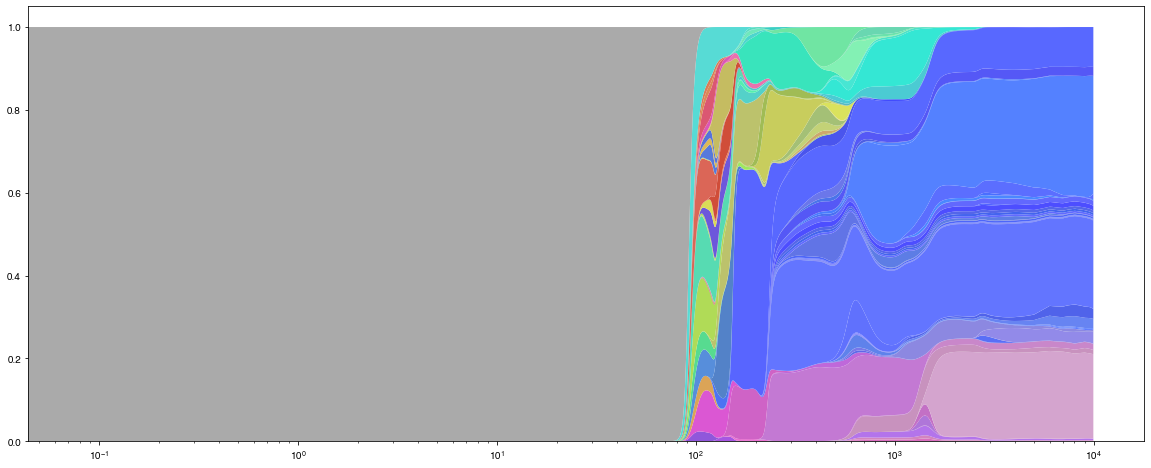

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(system, ax=ax, relative_abundance=True, apply_palette_depth=1, t_max=T_total, log_x_axis=True)

In [18]:
for i in range(system.num_types):
    
    if(system.type_set.parent_indices[i] is None):
        continue
    
    parent_index       = system.type_set.parent_indices[i]
    parent_index_bylin = np.where(np.array(system.type_set.lineage_ids) == '.'.join(system.type_set.lineage_ids[i].split('.')[:-1]))[0][0]
    
    print(parent_index, '->', i)
    print(system.type_set.sigma[i])
    print(system.type_set.sigma[parent_index])
    
    print(parent_index_bylin, '->', i)
    print(system.type_set.sigma[i])
    print(system.type_set.sigma[parent_index_bylin])
        
    # print(i, '<-', system.type_set.parent_indices[i])
    # print(system.type_set.lineage_ids[i], '<-', system.type_set.lineage_ids[system.type_set.parent_indices[i]])
    # print('(', '.'.join(system.type_set.lineage_ids[i].split('.')[:-1]), ')')
    # print(np.where(np.array(system.type_set.lineage_ids) == '.'.join(system.type_set.lineage_ids[i].split('.')[:-1]))[0][0])
    # print(system.type_set.sigma[i])
    # print(system.type_set.sigma[system.type_set.parent_indices[i]])
    
    print()
    

0 -> 1
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 -> 1
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

1 -> 2
[1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
1 -> 2
[1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]

1 -> 3
[0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
1 -> 3
[0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]

3 -> 4
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
3 -> 4
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]

1 -> 5
[0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
1 -> 5
[0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]

1 -> 6
[0. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
1 -> 6
[0. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]

1 -> 7
[0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
1 -> 7
[0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
